# 6_Marketing_Expenses_Optimization_Analysis

<a id='back'><a/>
# Table of Contents
    
- [1. Marketing Expenses Optimization Analysis Overview](#1)
- [2. General Information Overview](#2)
    - [2.1 Visits File](#2.1)
    - [2.2 Orders File](#2.2)
    - [2.3 Costs File](#2.3)
    - [2.4 Conclusion](#2.4)
- [3. Data Preprocessing](#3)
    - [3.1 Changing Data Types](#3.1)
    - [3.2 Conclusion](#3.2)
- [4. Exploratory Data Analysis](#4)
    - [4.1 Product](#4.1)
        - [4.1.1 User Activity](#4.1.1)
        - [4.1.2 Sessions Per Day](#4.1.2)
        - [4.1.3 Session Length](#4.1.3)
        - [4.1.4 Return Visitors](#4.1.4)
        - [4.1.5 Conclusion](#4.1.5)
    - [4.2 Sales](#4.2)
        - [4.2.1 Users First Purchase & Average Purchase](#4.2.1)
        - [4.2.2 Orders Placed](#4.2.2)
        - [4.2.3 Lifetime Value](#4.2.3)
        - [4.2.4 Conclusion](#4.2.4)
    - [4.3 Marketing](#4.3)
        - [4.3.1 Marketing Campaign Spend](#4.3.1)
        - [4.3.2 Customer Acquisition Cost](#4.3.2)
        - [4.3.3 Return on Marketing Investment](#4.3.3)
        - [4.3.4 Conclusion](#4.3.4)
- [5. General Conclusion](#5)

<a id='1'><a/>
# 1. Marketing Expenses Optimization Analysis
[Return to Table of Contents](#back)

*Afisha*, a subsidiary of Yandex, is a ticketing sales service based in Russia with operations in multiple cities across the country. Management has requested that we analyze marketing expenses from one full year, June 2017-May 2018, to find opportunities for optimization. To do this, we will study how people use the product, when they start to buy, how much revenue each customer brings, and when Afisha sees a return on the buyers. At the end of our study, we will provide a General Conclusion of our findings.

<a id='2'><a/>
# 2. General Information Overview
[Return to Table of Contents](#back)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
try: # local path
    df_visits= pd.read_csv('visits_log_us.csv')
    df_orders= pd.read_csv('orders_log_us.csv')
    df_costs= pd.read_csv('costs_us.csv')
except: # server path
    df_visits= pd.read_csv('/datasets/visits_log_us.csv')
    df_orders= pd.read_csv('/datasets/orders_log_us.csv')
    df_costs= pd.read_csv('/datasets/costs_us.csv')

<a id='2.1'><a/>
## 2.1 Visits File
[Return to Table of Contents](#back)

In [3]:
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
df_visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [5]:
df_visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [6]:
df_visits.duplicated().sum()

0

The memory usage for this file is large. Several categories need to be adjusted which should reduce the storage needs:
<li>'Device' - there are only two options, as such this should be a category
<li>'End Ts' and Start Ts' - these should be converted to datetime

<br>
<br>
There are no duplicates and no missing values.

<a id='2.2'><a/>
## 2.2 Orders File
[Return to Table of Contents](#back)

In [7]:
df_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
df_orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [9]:
df_orders.duplicated().sum()

0

Only series 'Buy Ts' needs to be have its type changed (to datetime). There are no duplicates and no missing values.

<a id='2.3'><a/>
## 2.3 Costs File
[Return to Table of Contents](#back)

In [10]:
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [11]:
df_costs.source_id.value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

In [12]:
df_costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [13]:
df_costs.duplicated().sum()

0

Only series 'dt' needs to be have its type changed (to datetime). There are no duplicates and no missing values.

<a id='2.4'><a/>
## 2.4 Conclusion
[Return to Table of Contents](#back)

These files are generally "clean". There are no missing values and no duplicates. Certain series do need to have their categories adjusted. Looking at the number of rows amongst the three files, we can already get a sense that there is a big drop off from visits to actual orders which we will explore more later. 

<a id='3'><a/>
# 3. Data Preprocessing
[Return to Table of Contents](#back)

In [14]:
# the series titles for these two files were uppercase and had spaces. Fixing that and renaming for ease here

df_visits = df_visits.rename(columns={"Device": "device", "End Ts": "end_time", "Source Id": "source_id", "Start Ts": "start_time", "Uid": "uid"})
df_orders = df_orders.rename(columns={"Buy Ts": "order_date", "Revenue": "revenue", "Uid": "uid"})

<a id='3.1'><a/>
## 3.1 Changing Data Types
[Return to Table of Contents](#back)

In [15]:
# as mentioned above, converting these series to datetime

df_visits['end_time'] = pd.to_datetime(df_visits['end_time'], format='%Y.%m.%d %H:%M:%S') 
df_visits['start_time'] = pd.to_datetime(df_visits['start_time'], format='%Y.%m.%d %H:%M:%S') 
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'], format='%Y.%m.%d %H:%M:%S') 
df_costs['dt'] = pd.to_datetime(df_costs['dt'], format='%Y.%m.%d %H:%M:%S') 

In [16]:
print(df_visits.start_time.min())
print(df_visits.start_time.max())

2017-06-01 00:01:00
2018-05-31 23:59:00


In [17]:
# as mentioned above, converting this series to category

df_visits['device'] = df_visits['device'].astype('category')

<a id='3.2'><a/>
## 3.2 Conclusion
[Return to Table of Contents](#back)

The four series across the three files provided were converted to their proper data types (datetime and category).

<a id='4'><a/>
# 4. Exploratory Data Analysis
[Return to Table of Contents](#back)

<a id='4.1'><a/>
## 4.1 Product
[Return to Table of Contents](#back)

Before performing our market analysis, we will add additional series with the datetime parameters that we require and we will also separate the dat by type of device. 

In [18]:
df_visits_product = df_visits

In [19]:
df_visits_product['session_year']  = df_visits_product['start_time'].astype('datetime64[Y]')
df_visits_product['session_month'] = df_visits_product['start_time'].astype('datetime64[M]')
df_visits_product['session_week']  = df_visits_product['start_time'].astype('datetime64[W]')
df_visits_product['session_date'] = df_visits_product['start_time'].astype('datetime64[D]')

In [20]:
df_visits_product.head()

,device,end_time,source_id,start_time,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [21]:
df_visits_touch = df_visits_product.query('device=="touch"')
df_visits_desktop = df_visits_product.query('device=="desktop"')

<a id='4.1.1'><a/>
### 4.1.1 User Activity
[Return to Table of Contents](#back)

In [22]:
def user_activity(x):
    dau_total = x.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
    wau_total = x.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
    mau_total = x.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
    
    dau_mean = int(dau_total['uid'].mean())
    wau_mean = int(wau_total['uid'].mean())
    mau_mean = int(mau_total['uid'].mean())
    
    dau_wau = dau_mean / wau_mean
    dau_mau = dau_mean / mau_mean

    print("Monthly Active Users:",int(mau_mean))
    print("Weekly Active Users:",int(wau_mean))
    print("Daily Active Users:",int(dau_mean))

    print()
    print("DAU / WAU ratio: {:.2%}".format(dau_wau))
    print("DAU / MAU ratio: {:.2%}".format(dau_mau))
    
    plt.figure(figsize=(15, 5))
    plt.plot(mau_total['session_month'], mau_total['uid'], color = 'green', label='MAU')
    plt.plot(wau_total['session_week'], wau_total['uid'], color = 'orange', label='WAU')
    plt.plot(dau_total['session_date'], dau_total['uid'], color = 'red', label='DAU')
    plt.legend(loc='upper right')
    plt.title('MAU / WAU / DAU')
    plt.xlabel('Time')
    plt.ylabel('Users')
    plt.show()

Monthly Active Users: 6825
Weekly Active Users: 1607
Daily Active Users: 252

DAU / WAU ratio: 15.68%
DAU / MAU ratio: 3.69%


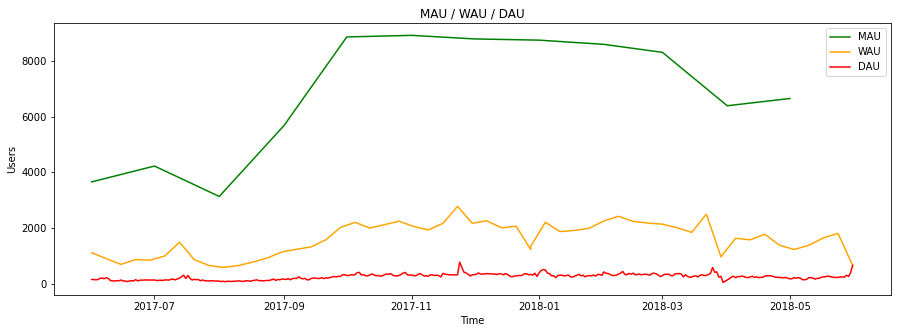

In [23]:
user_activity(df_visits_touch)

Monthly Active Users: 16724
Weekly Active Users: 4061
Daily Active Users: 659

DAU / WAU ratio: 16.23%
DAU / MAU ratio: 3.94%


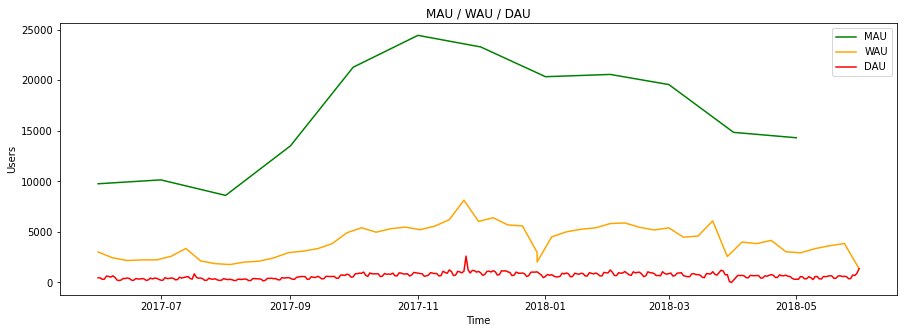

In [24]:
user_activity(df_visits_desktop)

The DAU / WAU and DAU / MAU ratios for touchscreen devices are 15.68% and 3.69%, respectively. For desktop devices, the metrics are slightly better at 16.23% and 3.94% However, both of these ratios are far below what is considered "good" by industry standards (i.e. 60% and 20%)

<a id='4.1.2'><a/>
### 4.1.2 Sessions Per Day
[Return to Table of Contents](#back)

In [25]:
def sessions_per_day(x):
    x.groupby('session_date').uid.count().plot(figsize=(15,5))

    plt.title('Sessions Per Day')
    plt.xlabel('Date')
    plt.ylabel('Number of Sessions')

    plt.show()
    
    print("On average, there are {:.0f} sessions per day".format(x.groupby('session_date').uid.count().mean()))

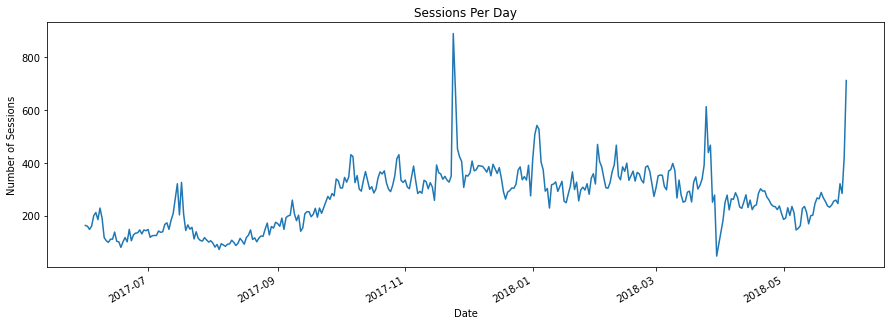

On average, there are 267 sessions per day


In [26]:
sessions_per_day(df_visits_touch)

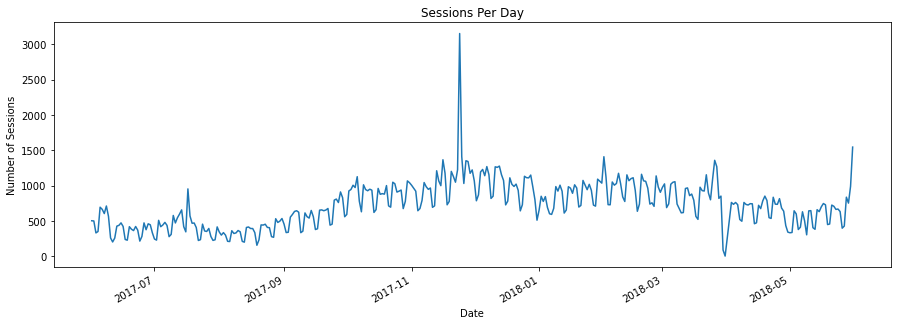

On average, there are 721 sessions per day


In [27]:
sessions_per_day(df_visits_desktop)

In [28]:
sessions_per_day_outliers = df_visits_product.groupby('session_date').uid.count().to_frame().reset_index().rename(columns={"uid":"number_of_sessions"})

In [29]:
sessions_per_day_outliers['session_date'] = pd.to_datetime(sessions_per_day_outliers['session_date'], format='%Y.%m.%d %H:%M:%S') 

In [30]:
sessions_per_day_outliers[(sessions_per_day_outliers.number_of_sessions<500) & (sessions_per_day_outliers.session_date>'2017-12-31')]

,session_date,number_of_sessions
302,2018-03-30,134
303,2018-03-31,1
341,2018-05-09,464


In [31]:
sessions_per_day_outliers[(sessions_per_day_outliers.number_of_sessions>2000)]

,session_date,number_of_sessions
176,2017-11-24,4042
177,2017-11-25,2089
363,2018-05-31,2256


On average, there were 267 sessions per day on a touchscreen device while there were 721 sessions on a desktop device. It is important to note that there appeared to be certain irregularities in the data regardless of device. There were significant spikes in the number of sessions on 11/24/17, 11/25/17 and 05/31/2018 and material drop-offs on 03/30/18, 03/31/18, and 05/09/2018. One possible explanation for the spike could be a promotional marketing campaign. For the drop offs, perhaps there was a system malfunction. We recommend contacting to the Marketing and IT teams to investigate further. 

<a id='4.1.3'><a/>
### 4.1.3 Session Length
[Return to Table of Contents](#back)

In [32]:
def session_length(x):
    y = (x['end_time'] - x['start_time']).dt.seconds
    print("Average Session Length (ASL): {:.2f} seconds".format(y.mean()))
    print("Mode: {:.2f} seconds".format(int(y.mode())))
    
    print()
    print()
    
    y.hist(bins=50, range=(0,6000), grid=False) 

    plt.title('Sessions Distribution')
    plt.xlabel('seconds')
    plt.ylabel('Number of Sessions')

    plt.show()

Average Session Length (ASL): 479.62 seconds
Mode: 60.00 seconds




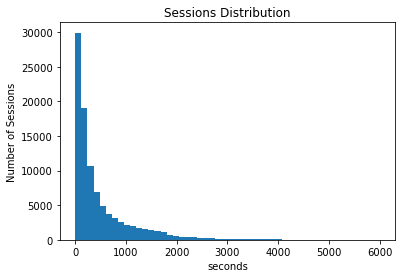

In [33]:
session_length(df_visits_touch)

Average Session Length (ASL): 703.95 seconds
Mode: 60.00 seconds




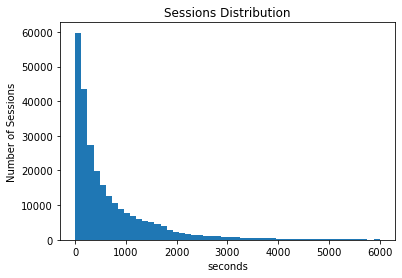

In [34]:
session_length(df_visits_desktop)

The ASL on a touchscreen device is 480 seconds while on a desktop it is 704 seconds. It is important to note however that the data has a negative skew, therefore we should consider the mode instead, which is 60 seconds for both devices.

<a id='4.1.4'><a/>
### 4.1.4 Return Visitors
[Return to Table of Contents](#back)

We will begin by forming cohorts on the basis of first visit date.

In [35]:
# date of first user session

first_visit_date = df_visits.groupby('uid')['session_date'].min()
first_visit_date.name = 'first_visit_date'
df_visits = df_visits.merge(first_visit_date, on='uid')

In [36]:
# specifing the appropriate date format

df_visits['first_visit_month']= df_visits['first_visit_date'].astype('datetime64[M]')
df_visits['visit_month']= df_visits['session_date'].astype('datetime64[M]')

In [37]:
# user lifetime within cohorts

df_visits['cohort_lifetime'] = df_visits['visit_month'] - df_visits['first_visit_month']
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime']/np.timedelta64(1, 'M')
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'].round().astype('int')

In [38]:
# grouping data by cohort & lifetime to find the number of active users at a certain lifetime for each cohort

cohorts = df_visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [39]:
# initial number of users in cohort

initial_user_count = cohorts[cohorts['cohort_lifetime']==0][['first_visit_month','uid']]
initial_user_count = initial_user_count.rename(columns={'uid':'cohort_users'})
print(initial_user_count)

   first_visit_month  cohort_users
0         2017-06-01         13259
12        2017-07-01         13140
23        2017-08-01         10181
33        2017-09-01         16704
42        2017-10-01         25977
50        2017-11-01         27248
57        2017-12-01         25268
63        2018-01-01         22624
68        2018-02-01         22197
72        2018-03-01         20589
75        2018-04-01         15709
77        2018-05-01         15273


In [40]:
cohorts = cohorts.merge(initial_user_count, on='first_visit_month')

In [41]:
# retention rate calculation

cohorts['retention']= cohorts['uid']/cohorts['cohort_users']

In [42]:
retention_pivot = cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='retention', aggfunc='sum')

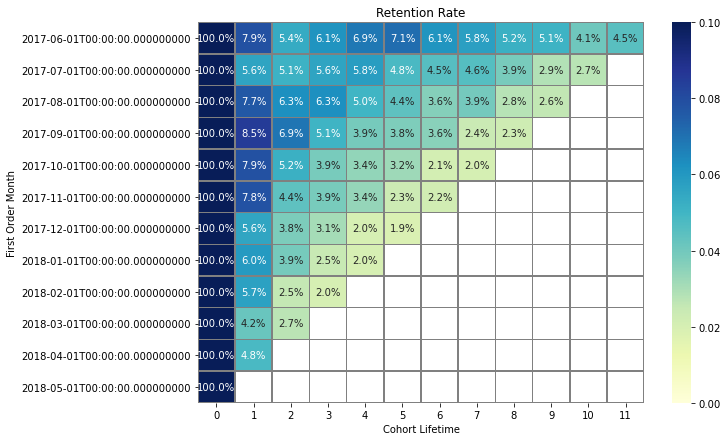

In [43]:
plt.figure(figsize=(10, 7))
sns.heatmap(data=retention_pivot, annot=True, linewidths=.5, fmt='.1%', linecolor='gray', cmap="YlGnBu", vmax= 0.1, vmin=0)

plt.title("Retention Rate")
plt.xlabel("Cohort Lifetime")
plt.ylabel("First Order Month")


plt.show()

In [44]:
def return_visitors(x):
    sessions_per_user = x.groupby(['session_year', 'session_month']).agg({'uid': ['count','nunique']})
    sessions_per_user.columns = ['n_sessions', 'n_users']
    sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
    print(sessions_per_user)
    print()
    print("Users return on average {:.2f} times per month".format(sessions_per_user.sessions_per_user.mean()))

In [45]:
return_visitors(df_visits_touch)

                            n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017-01-01   2017-06-01           4147     3655           1.134610
             2017-07-01           4878     4223           1.155103
             2017-08-01           3501     3132           1.117816
             2017-09-01           6551     5679           1.153548
             2017-10-01          10511     8856           1.186879
             2017-11-01          11052     8913           1.239987
             2017-12-01          10871     8785           1.237450
2018-01-01   2018-01-01          10362     8741           1.185448
             2018-02-01          10105     8590           1.176368
             2018-03-01           9818     8303           1.182464
             2018-04-01           7284     6387           1.140442
             2018-05-01           7753     6647           1.166391

Users return on average 1.17 times per month


In [46]:
return_visitors(df_visits_desktop)

                            n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017-01-01   2017-06-01          12358     9761           1.266059
             2017-07-01          12950    10145           1.276491
             2017-08-01          10854     8611           1.260481
             2017-09-01          17356    13509           1.284773
             2017-10-01          27392    21286           1.286855
             2017-11-01          32917    24439           1.346905
             2017-12-01          31112    23294           1.335623
2018-01-01   2018-01-01          26577    20350           1.305995
             2018-02-01          27077    20574           1.316079
             2018-03-01          25861    19574           1.321191
             2018-04-01          19231    14844           1.295540
             2018-05-01          18882    14312           1.319312

Users return on average 1.30 times per month


<a id='4.1.5'><a/>
### 4.1.5 Conclusion
[Return to Table of Contents](#back)

The DAU / WAU and DAU / MAU ratios for touchscreen devices are 15.5% and 3.7%, respectively. For desktop devices, the metrics are slightly better at 16% and 3.9% However, both of these ratios are far below the what is considered "good" by industry standards (i.e. 60% and 20%). On average, there were 267 sessions per day on a touchscreen device while there were 721 sessions on a desktop device. It is important to note that there appeared to be certain irregularities in the data regardless of device which were detailed further above. The ASL on a touchscreen device is 480 seconds while on a desktop it is 704 seconds. Given that the data had a negative skew for both devices, we considered the mode instead, which is 60 seconds for both devices. Finally, for touchscreen devices, users return 1.17 times per month and 1.30 times per month for desktop devices. Across every product parameter we evaluated and summarized here, users were more engaged on desktop devices versus touchscreens. 

<a id='4.2'><a/>
## 4.2 Sales
[Return to Table of Contents](#back)

<a id='4.2.1'><a/>
### 4.2.1 First Purchases
[Return to Table of Contents](#back)

In [47]:
visits_orders = df_orders.merge(df_visits, on='uid', how = 'left')

In [48]:
first_orders = visits_orders.groupby('uid')['order_date'].min()

In [49]:
first_orders.name = 'order_date2'

In [50]:
visits_orders = visits_orders.merge(first_orders, on='uid')

In [51]:
visits_orders['first_order_date'] = visits_orders['order_date2']

In [52]:
visits_orders['days_to_first_order'] = (visits_orders['first_order_date'] - visits_orders['first_visit_date']).dt.days

In [53]:
def days_until_first_order(days):
    
    if days == 0:
        return '0 days'
    if days == 1:
        return '1 day'
    if days == 2:
        return '2 days'
    if days == 3:
        return '3 days'
    if days == 4:
        return '4 days'
    if days == 5:
        return '5 days'
    else:
        return 'More than five days'


visits_orders['days_to_order_group'] = visits_orders['days_to_first_order'].apply(days_until_first_order)

visits_orders_pivot = visits_orders.pivot_table(index=['device'], columns='days_to_order_group', values='uid', aggfunc='nunique', fill_value=0)
display(visits_orders_pivot)

days_to_order_group,0 days,1 day,2 days,3 days,4 days,5 days,More than five days
device,,,,,,,
desktop,21031,1587,546,359,316,244,6519
touch,5128,587,238,146,128,95,2590


Most users place their first orders the same day they enter the website.

<a id='4.2.2'><a/>
### 4.2.2 Orders Made During a Given Period
[Return to Table of Contents](#back)

In [54]:
first_order_date_by_customers = df_orders.groupby('uid')['order_date'].min() 

In [55]:
first_order_date_by_customers.name = 'first_order_date'

In [56]:
orders = df_orders.join(first_order_date_by_customers,on='uid')

In [57]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

In [58]:
orders.head()

,order_date,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [59]:
monthly_orders_by_cohorts = (orders.pivot_table(index='first_order_month',
                            columns='order_month',
                            values='uid',
                            aggfunc='nunique')) 

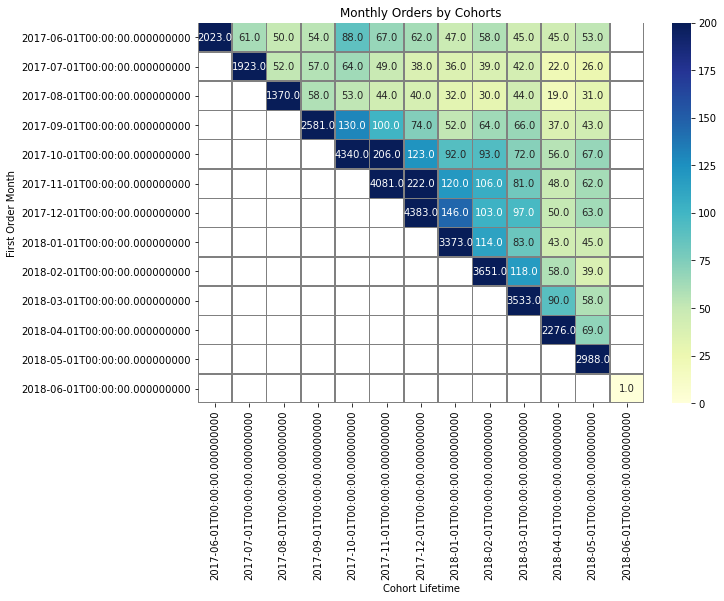

In [60]:
plt.figure(figsize=(10, 7))
sns.heatmap(data=monthly_orders_by_cohorts, annot=True, linewidths=.5, fmt='.1f', linecolor='gray', cmap="YlGnBu", vmin=0, vmax=200)

plt.title("Monthly Orders by Cohorts")
plt.xlabel("Cohort Lifetime")
plt.ylabel("First Order Month")


plt.show()

It is not the case that the revenue from every cohort is lower than that of the previous one. Cohorts 09-12 stand out in terms of the revenues they generate. This would be in line with an increase in the number of unique users during this period. This may be seasonal, more events being held toward the end of the year. It is notable that the retention rate amongst cohorts is very low. Users from a cohort will make a purchase and the vast majority will not make a return purchase.

<a id='4.2.3'><a/>
### 4.2.3 Average Purchase Size
[Return to Table of Contents](#back)

In [61]:
# forming cohorts by month of purchase

orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique','order_date':'count'})

In [62]:
# including revenue / user

orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid'] 

In [63]:
# pivot table showing changes in revenue per user for cohorts by the purchase month and assess changes in revenue per user over time

orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean') 

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


In [64]:
# check on the 138 that stands out above

orders_grouped_by_cohorts.query('order_month == "2017-12-01"')

,,revenue,uid,order_date,revenue_per_user
first_order_month,order_month,,,,
2017-06-01,2017-12-01,1922.74,62,276,31.011935
2017-07-01,2017-12-01,300.08,38,82,7.896842
2017-08-01,2017-12-01,676.85,40,85,16.921250
2017-09-01,2017-12-01,10261.52,74,164,138.669189
2017-10-01,2017-12-01,830.65,123,162,6.753252
2017-11-01,2017-12-01,1629.27,222,397,7.339054
2017-12-01,2017-12-01,20767.49,4383,5052,4.738191


In [65]:
# cohort's lifetime

orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']

In [66]:
# converting type to the number of months between the two dates

orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M') 

In [67]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
print(orders_grouped_by_cohorts[['first_order_month','order_month','cohort_lifetime']].head())
print(orders_grouped_by_cohorts[['first_order_month','order_month','cohort_lifetime']].tail()) 

  first_order_month order_month  cohort_lifetime
0        2017-06-01  2017-06-01                0
1        2017-06-01  2017-07-01                1
2        2017-06-01  2017-08-01                2
3        2017-06-01  2017-09-01                3
4        2017-06-01  2017-10-01                4
   first_order_month order_month  cohort_lifetime
74        2018-03-01  2018-05-01                2
75        2018-04-01  2018-04-01                0
76        2018-04-01  2018-05-01                1
77        2018-05-01  2018-05-01                0
78        2018-06-01  2018-06-01                0


In [68]:
# leaving only the year and month in the cohort identifier

orders_grouped_by_cohorts['first_order_month'].dt.strftime('%d.%m.%Y') 

0     01.06.2017
1     01.06.2017
2     01.06.2017
3     01.06.2017
4     01.06.2017
         ...    
74    01.03.2018
75    01.04.2018
76    01.04.2018
77    01.05.2018
78    01.06.2018
Name: first_order_month, Length: 79, dtype: object

In [69]:
# leaving only the year and month in the data on month of first purchase

orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m') 

In [70]:
# pivot table of changes in average revenue per user whose columns will contain the lifetime and whose rows will be cohorts

revenue_per_user_pivot = (orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',
                        values='revenue_per_user',aggfunc='mean'))

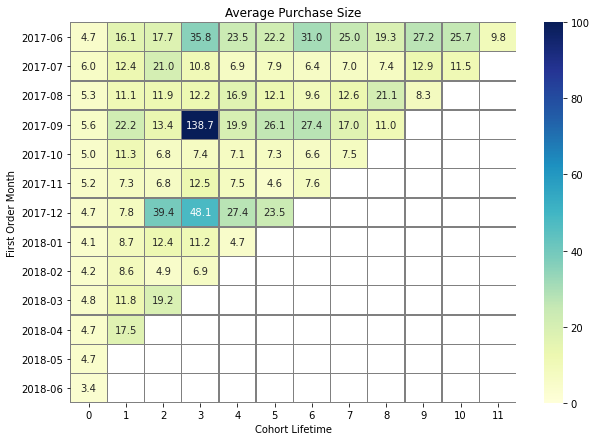

In [71]:
plt.figure(figsize=(10, 7))
sns.heatmap(data=revenue_per_user_pivot, annot=True, linewidths=.5, fmt='.1f', linecolor='gray', cmap="YlGnBu", vmin=0, vmax=100)

plt.title("Average Purchase Size")
plt.xlabel("Cohort Lifetime")
plt.ylabel("First Order Month")


plt.show()

In all cohorts we can see that the average purchase price in the 1st month is greater than in the 0th month. From this we can deduce that users spend more after the first month of becoming users. It is notable how much cohort 3 spent in September 2017. This needs to be examined further.

<a id='4.2.4'><a/>
### 4.2.4 Lifetime Value
[Return to Table of Contents](#back)

In [72]:
orders = orders.drop(['first_order_month'], axis=1)

In [73]:
# month of each customer's first purchase

first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [74]:
# number of new customers (n_buyers) for each month

cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [75]:
# adding customers' first-purchase months to the table of orders

orders_ = pd.merge(orders,first_orders, on='uid')
orders_.head()

,order_date,revenue,uid,first_order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [76]:
# grouping the table of orders by month of first purchase and month of purchase and sum up the revenue
# the row of the cohort table specifies the revenue the cohort brought in

cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head() 

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [77]:
# For purposes of cohort analysis, LTV is a cohort's cumulative revenue, per the number of people in the cohort 
# Adding data on how many users made their first purchases in each month to the cohorts table

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [78]:
# Since LTV is calculated on the basis of gross profit, not revenue, we need to find the gross profit by multiplying revenue by profitability 
# LTV is a relative parameter, and it's easier to study for "mature" cohorts, so making the columns show the cohort's age instead of the month of the order

margin_rate = .4

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head() 

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0
1,2017-06-01,2023,2017-07-01,981.82,392.728,1
2,2017-06-01,2023,2017-08-01,885.34,354.136,2
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4


In [79]:
# Finally calculating LTV
# Dividing the cohort's gross profit for each month by the total number of users in each cohort

report['ltv'] = report['gp'] / report['n_buyers']

output1 = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

output1.cumsum(axis=1)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.889766,2.083897,2.258952,2.640821,3.049833,3.344034,3.724210,3.956846,4.178131,4.420447,4.648951,4.751694
2017-07-01,2.404087,2.538172,2.787584,2.931174,3.001891,3.064310,3.112393,3.169121,3.233614,3.292472,3.354742,NaN
2017-08-01,2.110607,2.299404,2.482797,2.639308,2.836928,2.950345,3.034610,3.196613,3.313498,3.388689,NaN,NaN
2017-09-01,2.257812,2.704846,2.913218,4.503535,4.663758,4.922585,5.203228,5.300488,5.374091,NaN,NaN,NaN
2017-10-01,2.001493,2.215798,2.292356,2.355214,2.415838,2.463982,2.497909,2.544097,NaN,NaN,NaN,NaN
2017-11-01,2.061873,2.221566,2.301389,2.431370,2.490575,2.512126,2.558098,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.895276,1.999426,2.369465,2.795575,2.920747,3.055965,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.654254,1.772158,1.893870,1.950981,1.976060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.662795,1.774105,1.805511,1.835168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The average LTV for our cohorts is $2. The strongest performing cohorts in terms of cumulative LTV are months 06/2017 and 09/2017.

In [80]:
report2 = pd.DataFrame(output1.cumsum(axis=1).mean(axis=0),columns=['ltv_mean_age'])

In [81]:
report2

,ltv_mean_age
age,
0,1.920673
1,2.158266
2,2.328724
3,2.675905
4,2.919454
5,3.187621
6,3.355075
7,3.633433
8,4.024834


In [82]:
report= pd.merge(
    report,
    report2,
    how="inner",
    on='age')

<a id='4.2.4'><a/>
### 4.2.4 Conclusion
[Return to Table of Contents](#back)

In all cohorts we can see that the average purchase price in the 1st month is greater than in the 0th month. From this we can deduce that users do not become buyers right away, but take at least a month to make a purchase. It is notable how much cohort 3 spent in September 2017. This needs to be examined further. In all cohorts we can see that the number of orders in the 0th month is by far the largest, with orders falling off a cliff once into the second month. It is clear from the data that after the first month, users do not make a second purchase. The average LTV for our cohorts is ranged from $1.9-4.75. LTV improved with each new cohort, with the exception of ages 9 and 10.

<a id='4.3'><a/>
## 4.3 Marketing
[Return to Table of Contents](#back)

<a id='4.3.1'><a/>
### 4.3.1 Marketing Campaign Spend
[Return to Table of Contents](#back)

In [83]:
campaign_spend = df_costs['costs'].sum()

print("The marketing campaign spend totaled: ${:.0f}".format(campaign_spend))

The marketing campaign spend totaled: $329132


In [84]:
campaign_spend_per_source = df_costs.groupby('source_id')['costs'].sum()

In [85]:
campaign_spend_per_source

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [86]:
df_costs['month'] = df_costs['dt'].astype('datetime64[M]')

In [87]:
df_visits_product['session_month'] = df_visits_product['start_time'].astype('datetime64[M]')

<Figure size 720x504 with 0 Axes>

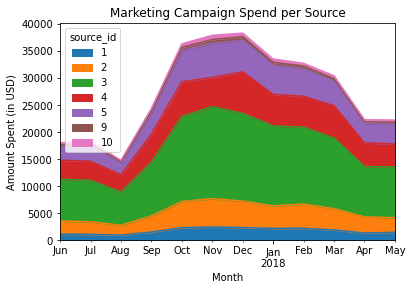

In [88]:
df_costs.groupby(['month','source_id'])['costs'].sum().unstack(1).plot.area()

plt.title("Marketing Campaign Spend per Source")
plt.xlabel("Month")
plt.ylabel("Amount Spent (in USD)")
plt.show()

In total, the most expensive campaign spend was in source 3 (141,321 was spent), while 9 and 10 were the least expensive (less than 6,000 was spent on each).

<a id='4.3.2'><a/>
### 4.3.2 Customer Acquisition Cost
[Return to Table of Contents](#back)

In [89]:
# calculating the costs per month

monthly_costs = df_costs.groupby('month')['costs'].sum()
monthly_costs.head() 

month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
Name: costs, dtype: float64

In [90]:
# adding the data on costs to the report and calculating CAC

report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head() 

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,ltv_mean_age,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766,1.920673,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131,2.158266,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055,2.328724,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869,2.675905,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012,2.919454,18015.0,8.905091


In [91]:
output3 = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='cac', 
    aggfunc='mean')

output3.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,8.905091,8.90509,8.90509,8.90509,8.90509,8.90509,8.90509,8.90509,8.90509,8.90509,8.90509,8.90509
2017-07-01,9.485486,9.48549,9.48549,9.48549,9.48549,9.48549,9.48549,9.48549,9.48549,9.48549,9.48549,
2017-08-01,10.796015,10.796,10.796,10.796,10.796,10.796,10.796,10.796,10.796,10.796,,
2017-09-01,9.441654,9.44165,9.44165,9.44165,9.44165,9.44165,9.44165,9.44165,9.44165,,,
2017-10-01,8.369327,8.36933,8.36933,8.36933,8.36933,8.36933,8.36933,8.36933,,,,
2017-11-01,9.288870,9.28887,9.28887,9.28887,9.28887,9.28887,9.28887,,,,,
2017-12-01,8.741809,8.74181,8.74181,8.74181,8.74181,8.74181,,,,,,
2018-01-01,9.937302,9.9373,9.9373,9.9373,9.9373,,,,,,,
2018-02-01,8.962758,8.96276,8.96276,8.96276,,,,,,,,


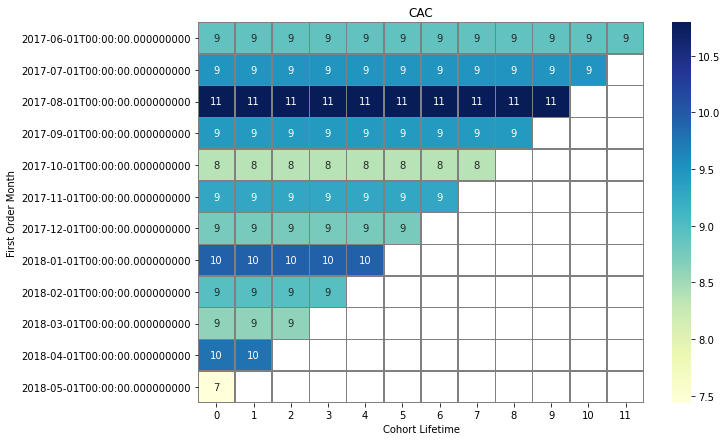

In [92]:
plt.figure(figsize=(10, 7))

ax = sns.heatmap(data=output3, annot=True, linewidths=.5, fmt='.0f', linecolor='gray', cmap="YlGnBu")

plt.title("CAC")
plt.xlabel("Cohort Lifetime")
plt.ylabel("First Order Month")
plt.show()

CAC spend ranged from 7-11 with the majority of chorts having a CAC of 9.

<a id='4.3.3'><a/>
### 4.3.3 Return on Marketing Investment
[Return to Table of Contents](#back)

In [93]:
# calculating ROMI

report_['romi'] = report_['ltv'] / report_['cac']
output2 = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output2.cumsum(axis=1)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.212212,0.234012,0.253670,0.296552,0.342482,0.375519,0.418211,0.444335,0.469185,0.496395,0.522055,0.533593
2017-07-01,0.253449,0.267585,0.293879,0.309017,0.316472,0.323052,0.328122,0.334102,0.340901,0.347106,0.353671,NaN
2017-08-01,0.195499,0.212986,0.229973,0.244471,0.262776,0.273281,0.281086,0.296092,0.306919,0.313883,NaN,NaN
2017-09-01,0.239133,0.286480,0.308550,0.476986,0.493956,0.521369,0.551093,0.561394,0.569190,NaN,NaN,NaN
2017-10-01,0.239146,0.264752,0.273900,0.281410,0.288654,0.294406,0.298460,0.303979,NaN,NaN,NaN,NaN
2017-11-01,0.221972,0.239164,0.247758,0.261751,0.268125,0.270445,0.275394,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.216806,0.228720,0.271050,0.319794,0.334112,0.349580,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.166469,0.178334,0.190582,0.196329,0.198853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.185523,0.197942,0.201446,0.204755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


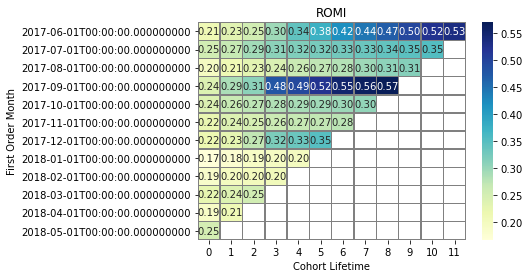

In [94]:
plt.figure(figsize=(10, 7))

sns.heatmap(data=output2.cumsum(axis=1), annot=True, linewidths=.5, fmt='.2f', linecolor='gray', cmap="YlGnBu")

plt.title("ROMI")
plt.xlabel("Cohort Lifetime")
plt.ylabel("First Order Month")
plt.show()

None of the cohorts have paid off. The June and September cohorts were the closest to doing so in later months

<a id='4.3.4'><a/>
### 4.3.4 Conclusion
[Return to Table of Contents](#back)

For the June 2017 - May 2018 marketing campaign 329132 was spent. The most expensive campaign spend was in source 3 (141,321 was spent), while 9 and 10 were the least expensive (less than 6,000 was spent on each). CAC spend ranged from 7-11 with the majority of chorts having a CAC of 9. In terms of ROMI, none of the cohorts have paid off. The June and September cohorts were the closest to doing so.

<a id='4.4'><a/>
## 4.4 Conclusion
[Return to Table of Contents](#back)

**Data Preprocessing**

The amount of data preprocessing necessary was minimal. There were no missing values or duplicates. Selecting series types needed to be altered.

**Exploratory Data Analysis**

In terms of the products, the DAU / WAU and DAU / MAU ratios for touchscreen devices are 15.5% and 3.7%, respectively. For desktop devices, the metrics are slightly better at 16% and 3.9% However, both of these ratios are far below the what is considered "good" by industry standards (i.e. 60% and 20%). On average, there were 267 sessions per day on a touchscreen device while there were 721 sessions on a desktop device. The ASL on a touchscreen device is 480 seconds while on a desktop it is 704 seconds. Given that the data had a negative skew for both devices, we considered the mode instead, which is 60 seconds for both devices. Finally, for touchscreen devices, users return 1.17 times per month and 1.30 times per month for desktop devices. Across every product parameter we evaluated and summarized here, users were more engaged on desktop devices versus touchscreens. 

Regarding sales, average purchase price in the 1st month is greater than in the 0th month. From this we can deduce that users do not become buyers right away, but take at least a month to make a purchase. It is notable how much cohort 3 spent in September 2017. This needs to be examined further. In all cohorts we can see that the number of orders in the 0th month is by far the largest, with orders falling off a cliff once into the second month. It is clear from the data that after the first month, users do not make a second purchase. The average LTC for our cohorts is $2.

For the June 2017 - May 2018 marketing campaign 329132 was spent. The most expensive campaign spend was in source 3 (141,321 was spent), while 9 and 10 were the least expensive (less than 6,000 was spent on each). CAC spend ranged from 7-11 with the majority of chorts having a CAC of 9. In terms of ROMI, none of the cohorts have paid off.

**Recommendations to the Marketing Team on Cost Optimization**

Based on the analysis we performed, costs need to be reduced. None of the cohorts have paid off in terms of ROI. The most expense marketing campaign was source 3. We recommend that cost cutting begin with that marketing source.